# *Project Title*

**Marketing Campaign for Banking Products**

**Description**

The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.

**Attributes**

**ID**: Customer ID

**Age**: Customer's age in completed years

**Experience**: #years of professional experience

**Income**: Annual income of the customer ($000)

**ZIP Code**: Home Address ZIP code.

**Family**: Family size of the customer

**CCAvg**: Avg. spending on credit cards per month ($000)

**Education**: Education Level. 1: Undergrad; 2: Graduate; 3:
Advanced/Professional

**Mortgage**: Value of house mortgage if any. ($000)

**Personal Loan**: Did this customer accept the personal loan offered in the last
campaign?

**Securities Account**: Does the customer have a securities account with the bank?

**CD Account**: Does the customer have a certificate of deposit (CD) account with
the bank?

**Online**: Does the customer use internet banking facilities?

**Credit card**: Does the customer use a credit card issued by the bank?

**Objective**

our goal is to predict the likelihood of a liability customer buying personal
loans.


Here our target variable is **Personal Loan**

# **1 Importing Dats sets and libraries**

In [1]:
# #uploading bank.xlsx file

# from google.colab import files
# uploaded = files.upload()

In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Importing dataset
data=pd.read_excel('Bank.xlsx')
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
data.head() #shows upper 5 rows data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
data.tail() #it shows last 5 rows of the data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [6]:
data.shape #no of columns and rows

(5000, 14)

In [7]:
data.info() #it gives total info such as no of non-null values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
data.describe().transpose() #describe() is used to view some basic statistical details like percentile, mean, std etc

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [9]:
data.dtypes #finding data types 

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [10]:
data.isnull().sum() #is used to find null values in the taken data

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# **2 Checking if any unusual values in data and performing cleansing of data**

In [11]:

data.loc[data.ID < 0, 'ID']

Series([], Name: ID, dtype: int64)

In [12]:
data.loc[data.Age < 0, 'Age']

Series([], Name: Age, dtype: int64)

In [13]:
data.loc[data.Experience < 0, 'Experience']

89     -1
226    -1
315    -2
451    -2
524    -1
536    -1
540    -1
576    -1
583    -1
597    -2
649    -1
670    -1
686    -1
793    -2
889    -2
909    -1
1173   -1
1428   -1
1522   -1
1905   -1
2102   -1
2430   -1
2466   -2
2545   -1
2618   -3
2717   -2
2848   -1
2876   -2
2962   -2
2980   -1
3076   -1
3130   -2
3157   -1
3279   -1
3284   -1
3292   -1
3394   -1
3425   -1
3626   -3
3796   -2
3824   -1
3887   -2
3946   -1
4015   -1
4088   -1
4116   -2
4285   -3
4411   -2
4481   -2
4514   -3
4582   -1
4957   -1
Name: Experience, dtype: int64

In [14]:
data.loc[data.Experience < 0, 'Experience']=data['Experience'].median()
#we are converting experience to 0 which are having negative values
data.loc[data.Experience < 0, 'Experience']

Series([], Name: Experience, dtype: int64)

In [15]:
data.loc[data.Income< 0, 'Income']

Series([], Name: Income, dtype: int64)

In [16]:
data.loc[data.Family < 0, 'Family']

Series([], Name: Family, dtype: int64)

In [17]:
data.loc[data.CCAvg < 0, 'CCAvg']

Series([], Name: CCAvg, dtype: float64)

In [18]:
data.loc[data.Education< 0, 'Education']

Series([], Name: Education, dtype: int64)

In [19]:
data.loc[data.Mortgage< 0, 'Mortgage']

Series([], Name: Mortgage, dtype: int64)

In [20]:
data.loc[data['Personal Loan']< 0, 'Personal Loan']

Series([], Name: Personal Loan, dtype: int64)

In [21]:
data.loc[data['Securities Account']< 0, 'Securities Account']

Series([], Name: Securities Account, dtype: int64)

In [22]:
data.loc[data['CD Account']< 0, 'CD Account']

Series([], Name: CD Account, dtype: int64)

In [23]:
data.loc[data['Online']< 0, 'Online']

Series([], Name: Online, dtype: int64)

In [24]:
data.loc[data['CreditCard']< 0, 'CreditCard']

Series([], Name: CreditCard, dtype: int64)

**Finding Correlation**

In this we are using heatmap on correlation and corr() method to fing highly correlated columns and after that we are going to delete them

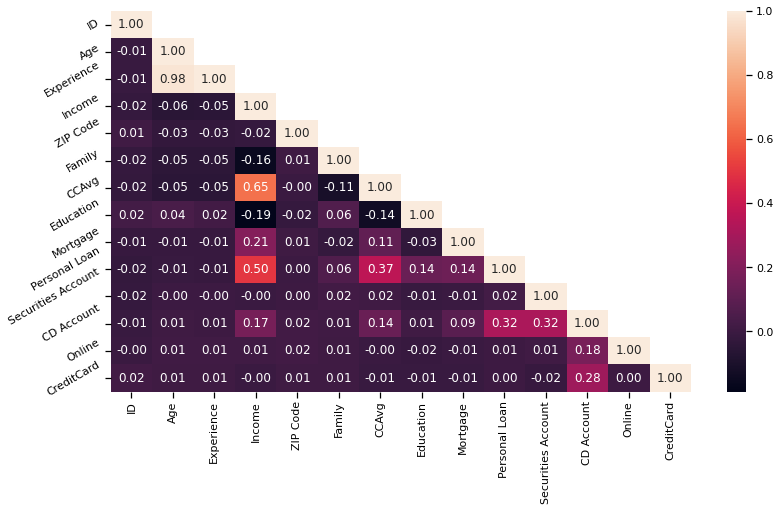

In [25]:
# Correlation with heat map

corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

**Observation**

From the above coorelation between 'Age' and 'Experience' is high 

and
'Income' and 'CCAVg' is moderately correlated


Text(0, 0.5, 'Age')

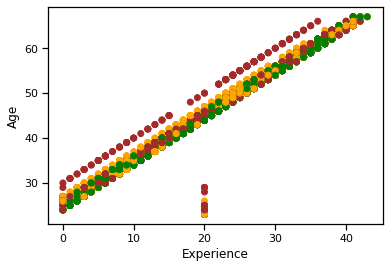

In [26]:
fig, ax = plt.subplots()
colors = {1:'green',2:'orange',3:'brown'}
ax.scatter(data['Experience'],data['Age'],c=data['Education'].apply(lambda x:colors[x]))

plt.xlabel('Experience')
plt.ylabel('Age')

**Observation** 

The above plot show with experience and age have a positive correlation. As experience increase age also increases. Also the colors show the education level. There is gap in the mid forties of age and also more people in the under graduate level

In [27]:
age=data['Age']
experience=data['Experience']
correlation=age.corr(experience)
correlation

0.9771816883703432

In [28]:

len(data['ZIP Code'].unique())

467

As we said above "Age" and "Experience" are highly coorelated so we have to remove either of them in order to not effect our model

and we also deleting "ID"  and "ZIP CODE" because they are not effecting our target, they are unnecessary data

Zip Code has 467 distinct values ,it is a nominal variable which has too many levels.it's better to drop Zip Code as well

In [29]:
data=data.drop(['ID','Experience','ZIP Code'],axis=1)
data

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


In [30]:
data.shape

(5000, 11)

# **3 Exploratory Data Analysis**

**3.1 Finding unique values in each column**

In [31]:
for i in data.columns:
  print(i,end=":")
  print(data[i].unique())
  print("length:",len(data[i].unique()))
  print(" ")
#data.nunique()

Age:[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
length: 45
 
Income:[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 224 218]
length: 162
 
Family:[4 3 1 2]
length: 4
 
CCAvg:[ 1.6         1.5         1.          2.7         0.4         0.3
  0.6         8.9         2.4         0.1         3.8         2.5

**3.2 Number of people with Zero Mortgage**

In [32]:

data.loc[data['Mortgage']==0, 'Mortgage'].count()

3462

**3.3 Number of people with zero credit card spending per month**

In [33]:
data.loc[data['CCAvg']==0, 'CCAvg'].count()

106

**3.4 Value counts of all categorical columns**

In [34]:

for column in data.columns:
     print("\n" + column+'\n')
     print(data[column].value_counts())


Age

35    151
43    149
52    145
54    143
58    143
50    138
41    136
30    136
56    135
34    134
39    133
57    132
59    132
51    129
45    127
60    127
46    127
42    126
31    125
40    125
55    125
29    123
62    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
67     12
23     12
Name: Age, dtype: int64

Income

44     85
38     84
81     83
41     82
39     81
       ..
202     2
203     2
189     2
224     1
218     1
Name: Income, Length: 162, dtype: int64

Family

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

CCAvg

0.300000    241
1.000000    231
0.200000    204
2.000000    188
0.800000    187
           ... 
3.250000      1
3.666667      1
4.666667      1
8.900000      1
2.750000      1
Name: CCAvg, Length: 108, dtype: int64

Education

1    2096
3    1501
2    1403
Name: Education, dty

# **3.5.1 Univariate Analysis**

In univariate analysis, each variable is analysed individually and we don’t look at more than one variable at a time. It is the simplest and basic form of analysis

**Scatter Plots**

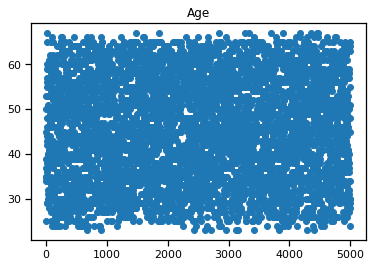

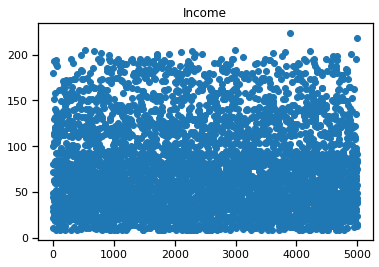

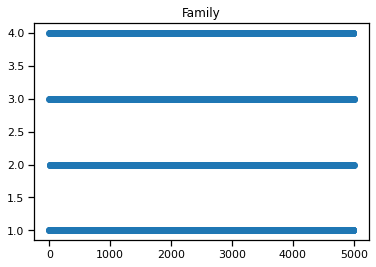

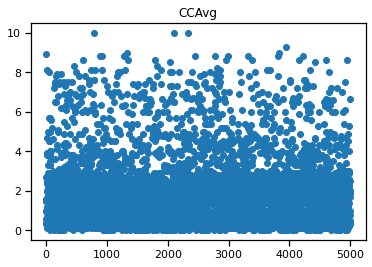

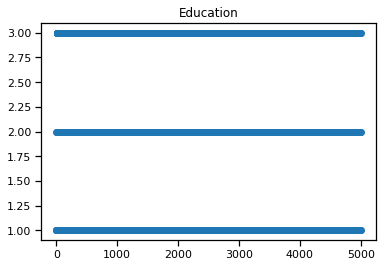

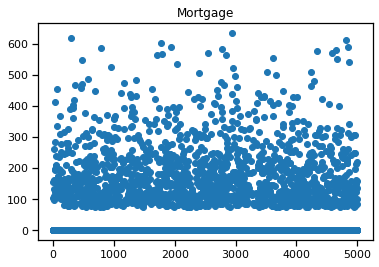

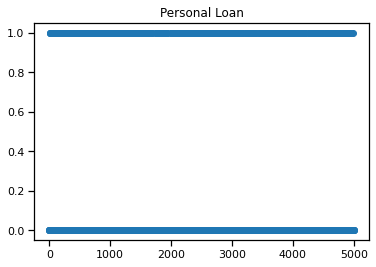

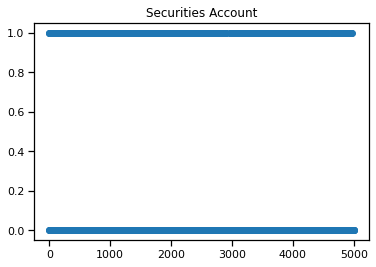

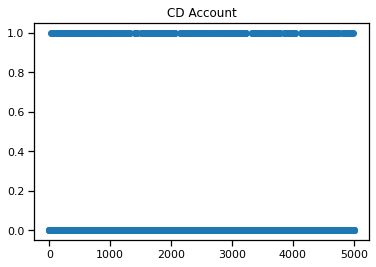

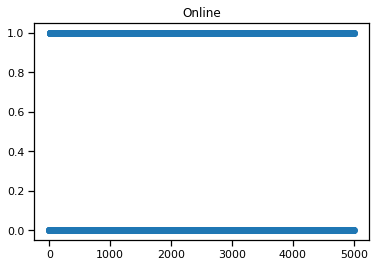

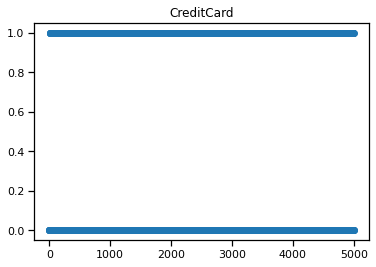

In [35]:
for col in data.columns:
  plt.scatter(data.index,data[col])
  plt.title(col)
  plt.show()

**Histograms**

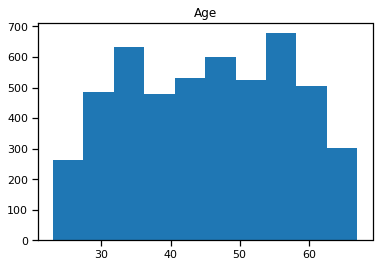

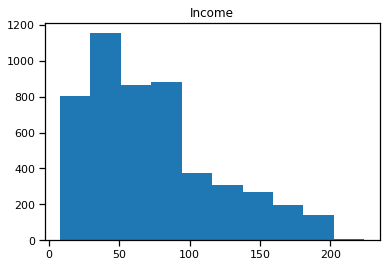

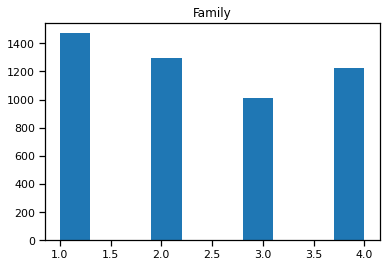

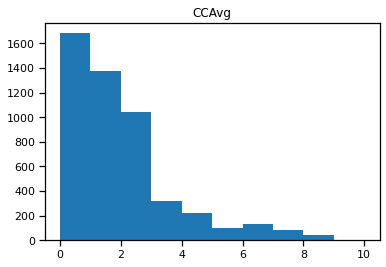

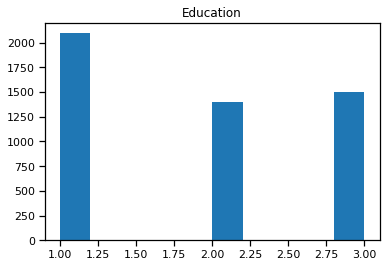

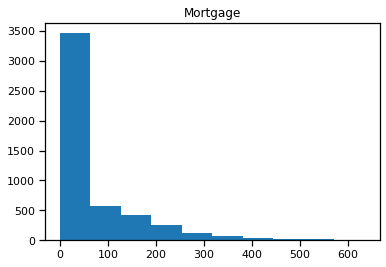

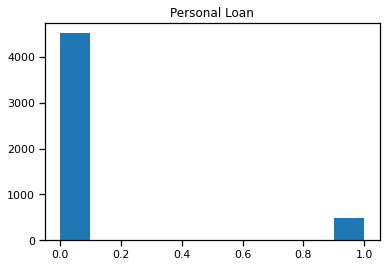

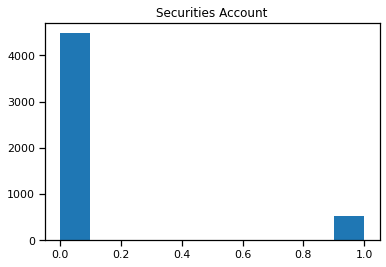

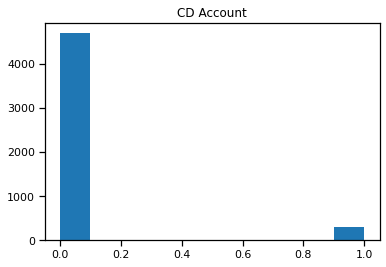

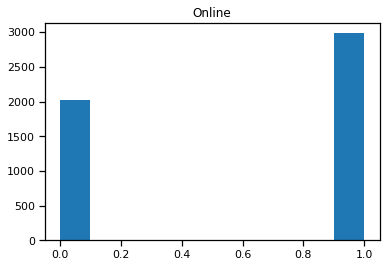

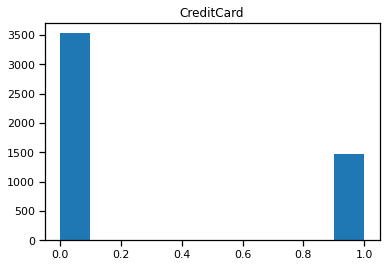

In [36]:
for i in data.columns:
  plt.hist(data[i])
  plt.title(i)
  plt.show()

**Distribution Plot**

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

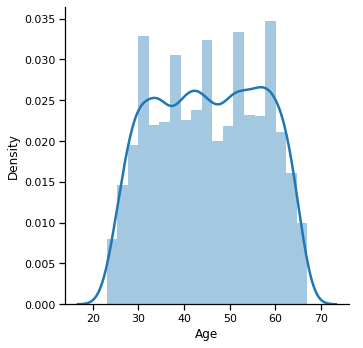

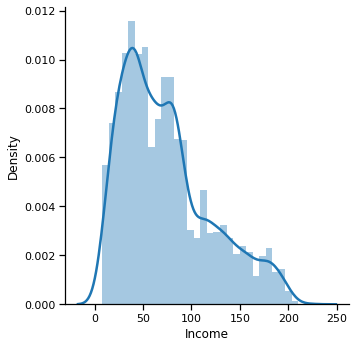

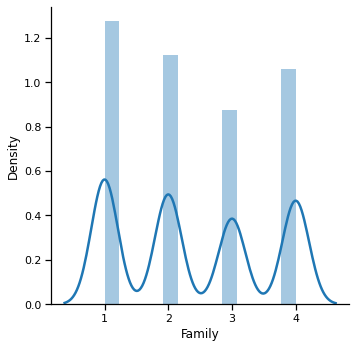

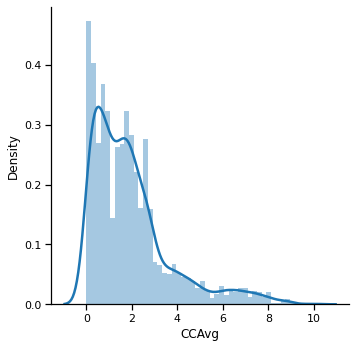

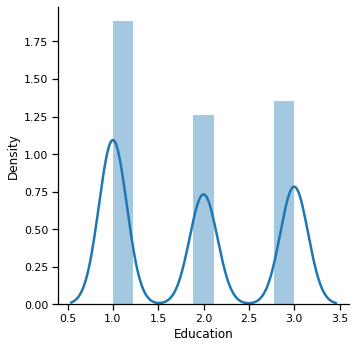

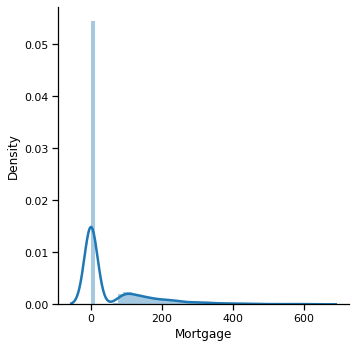

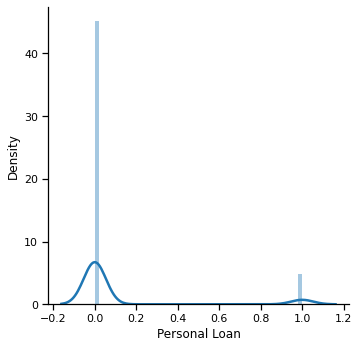

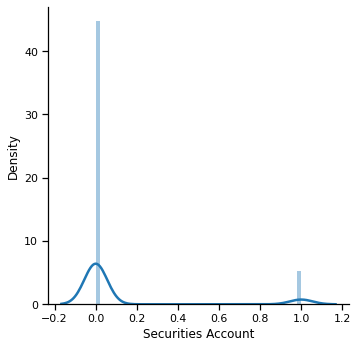

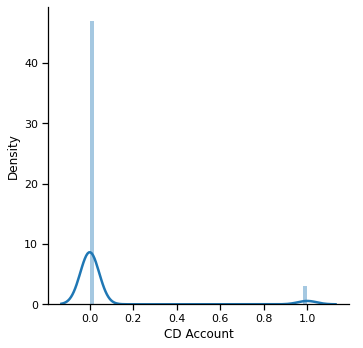

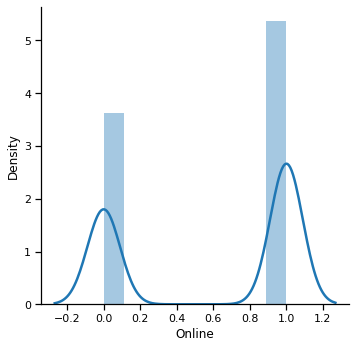

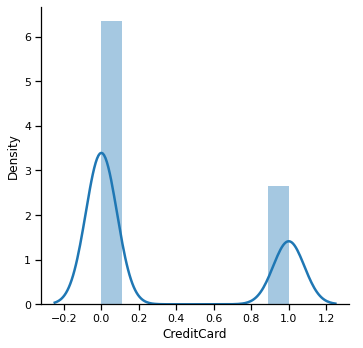

In [37]:
for col1 in data.columns:
  sns.FacetGrid(data,height=5).map(sns.distplot,col1).add_legend()

**Density Plot**

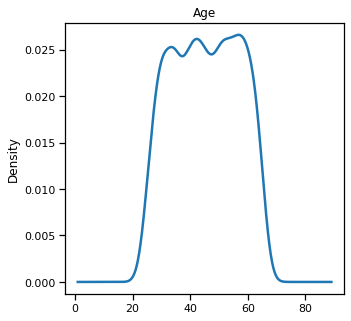

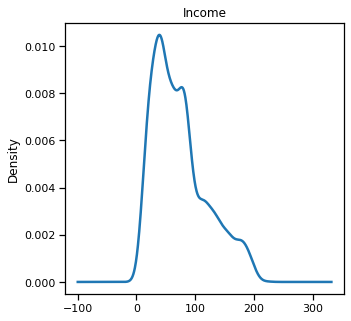

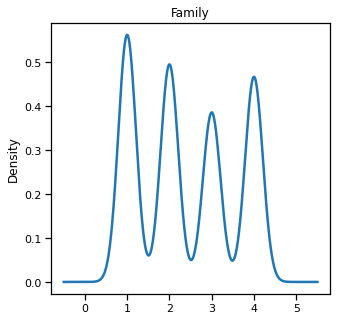

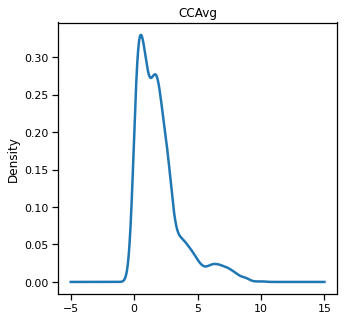

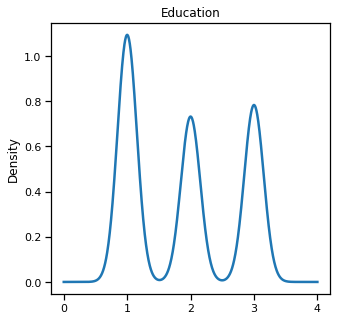

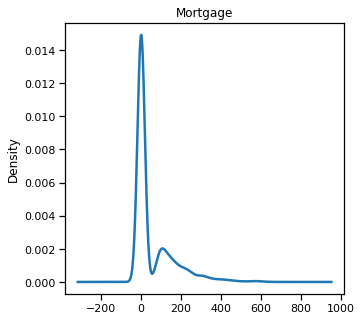

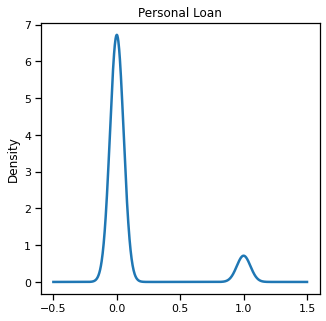

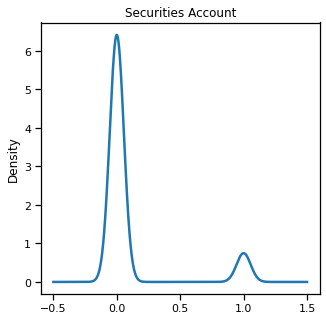

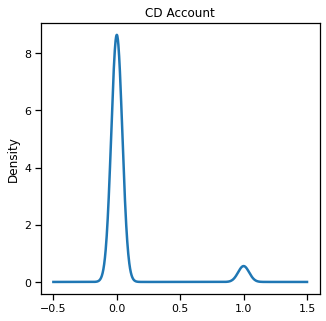

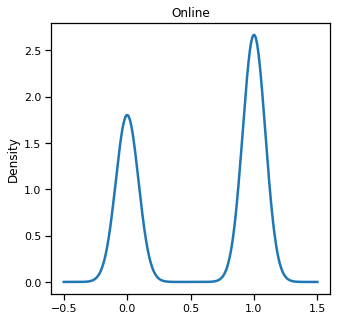

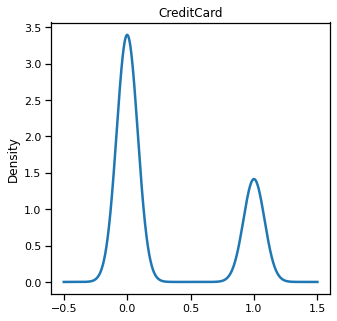

In [38]:
for k in data.columns:
  plt.figure(figsize=(5,5))
  data[k].plot(kind="density")
  plt.title(k)
  plt.show()

**Box Plot**

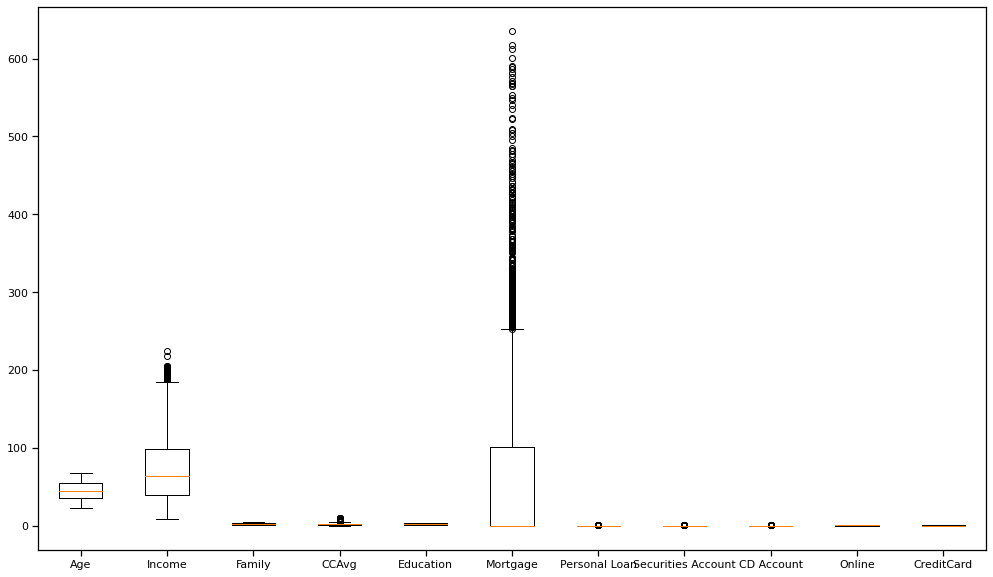

In [39]:
plt.figure(figsize=(17,10))
plt.boxplot(data.values,labels=data.columns)
plt.show()

**Violin Plot**

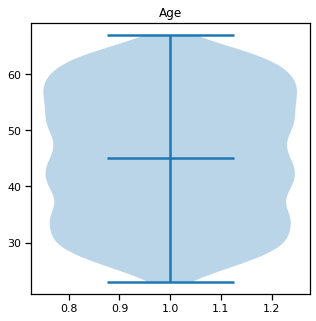

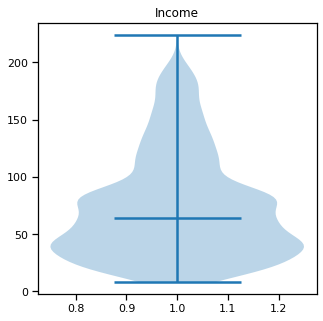

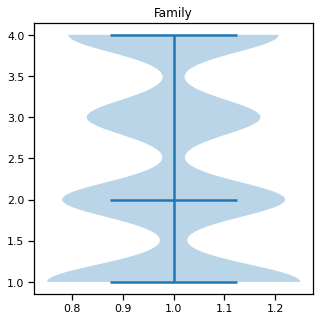

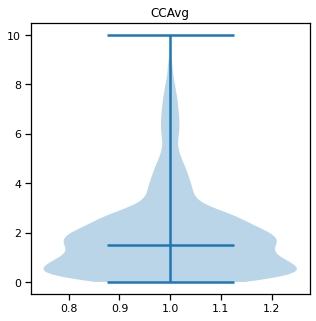

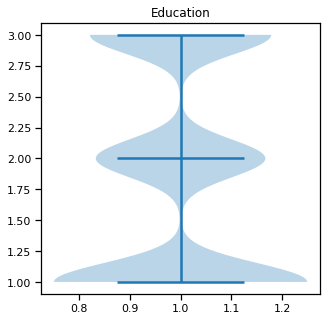

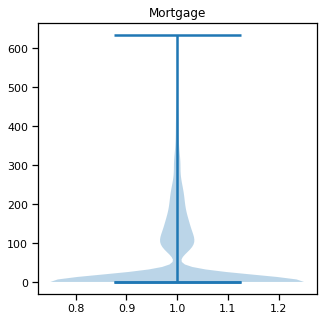

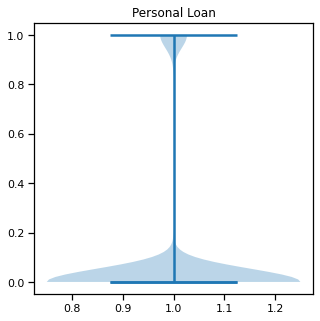

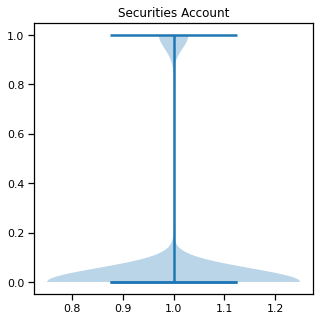

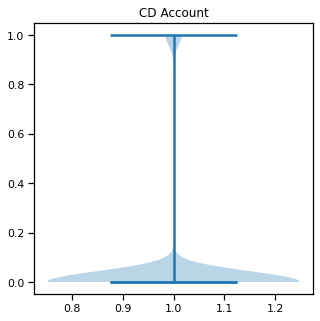

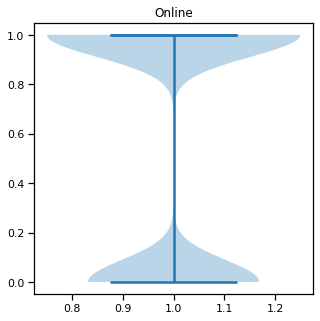

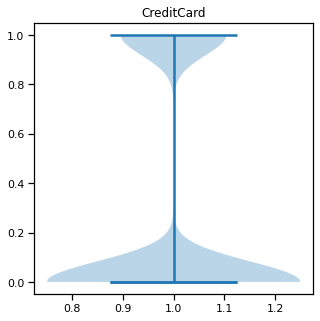

In [40]:
for i in data.columns:
  plt.figure(figsize=(5,5))
  plt.violinplot(data[i],showmedians=True)
  plt.title(i)
  plt.show()

<AxesSubplot:xlabel='Securities Account', ylabel='count'>

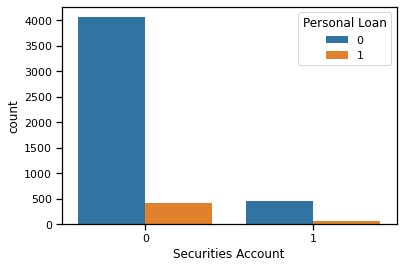

In [41]:
sns.countplot(x="Securities Account", data=data,hue="Personal Loan")

<AxesSubplot:xlabel='Family', ylabel='count'>

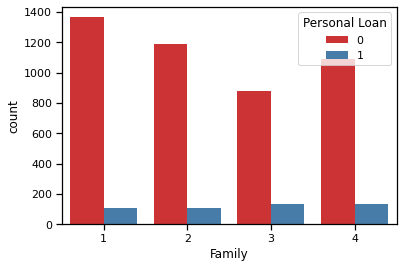

In [42]:
sns.countplot(x='Family',data=data,hue='Personal Loan',palette='Set1')

<AxesSubplot:xlabel='CD Account', ylabel='count'>

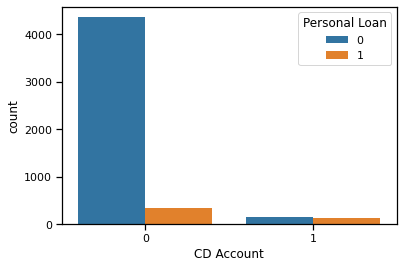

In [43]:
sns.countplot(x='CD Account',data=data,hue='Personal Loan')


# **Observation**

**Age** feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median


**Income** is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median

**CCAvg** is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K

**Mortgage** 70% of the individuals have a mortgage of less than 40K. However the max value is 635K

 Majority of customers who does not have loan have securities account

 Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.

 Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well



# 3.5.2 **Bivariate Analysis**

Bivariate analysis is the analysis of two variables where two variables are analysed to explore the relationship/association between them. Various inferential statistics can be used to perform Bivariate

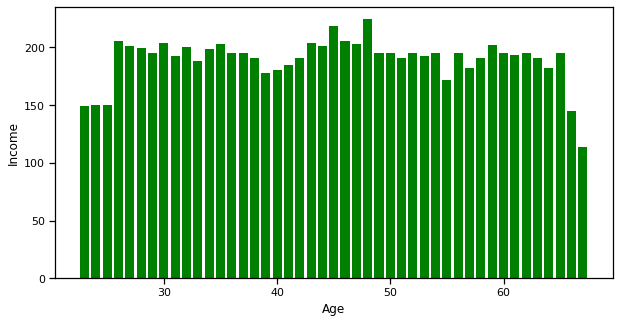

In [44]:
fig, ax = plt.subplots(figsize = (10,5))
ax.bar(data['Age'],data['Income'],color="green")
ax.set_xlabel('Age')
ax.set_ylabel('Income')
plt.show()


**Observation**

From above plot **Income** and **Age** not as much correlated

Text(0.5, 0, 'Age')

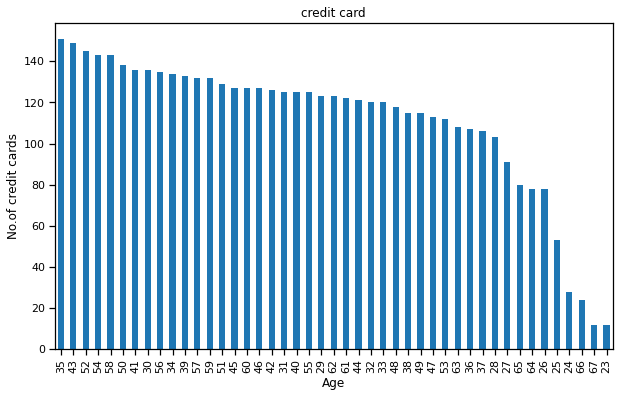

In [45]:
data['Age'].value_counts().plot.bar(figsize = (10,6))
plt.title("credit card")
plt.ylabel('No.of credit cards')
plt.xlabel('Age')

**Observation**

Above plot shows the relation between **Age** and how many people of that Age group uses **Credit Cards**

# 3.5.3 **MultiVariate Analysis**

such an analysis require analyzing more than two variables simultaneously. For example, if we have to analyse 4 variables at the same time, this causes an increase in dimensionality. It is extremely difficult for a human mind to visualise the relationship of 4 variables (4 Dimensions) in a graph and thus multivariate analysis is used (generally using special statistical software) to study more complex sets of data that cannot be analysed through univariate or bivariate analysis.

**Influence of income and education on personal loan**

<AxesSubplot:xlabel='Education', ylabel='Income'>

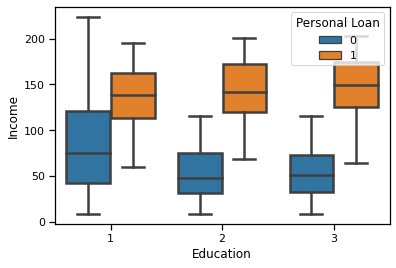

In [46]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=data)

**Observation**

It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

**Influence of Education and Mortgage on Personal Loan**

<AxesSubplot:xlabel='Education', ylabel='Mortgage'>

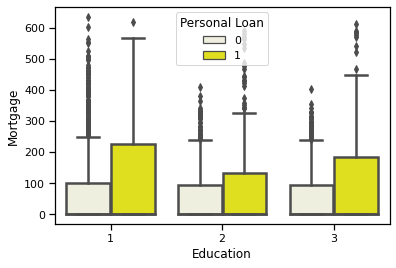

In [47]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=data,color='yellow')

**Observation**

From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage

<AxesSubplot:xlabel='Family', ylabel='Income'>

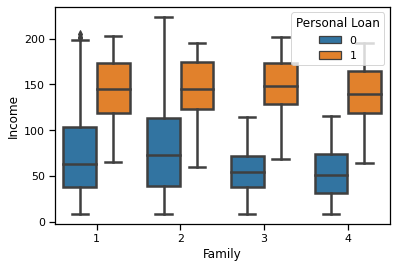

In [48]:
sns.boxplot(x=data.Family,y=data.Income,hue=data["Personal Loan"])


**Observation**

Looking at the above plot, families with income less than 100K are less likely to take loan,than families with high income

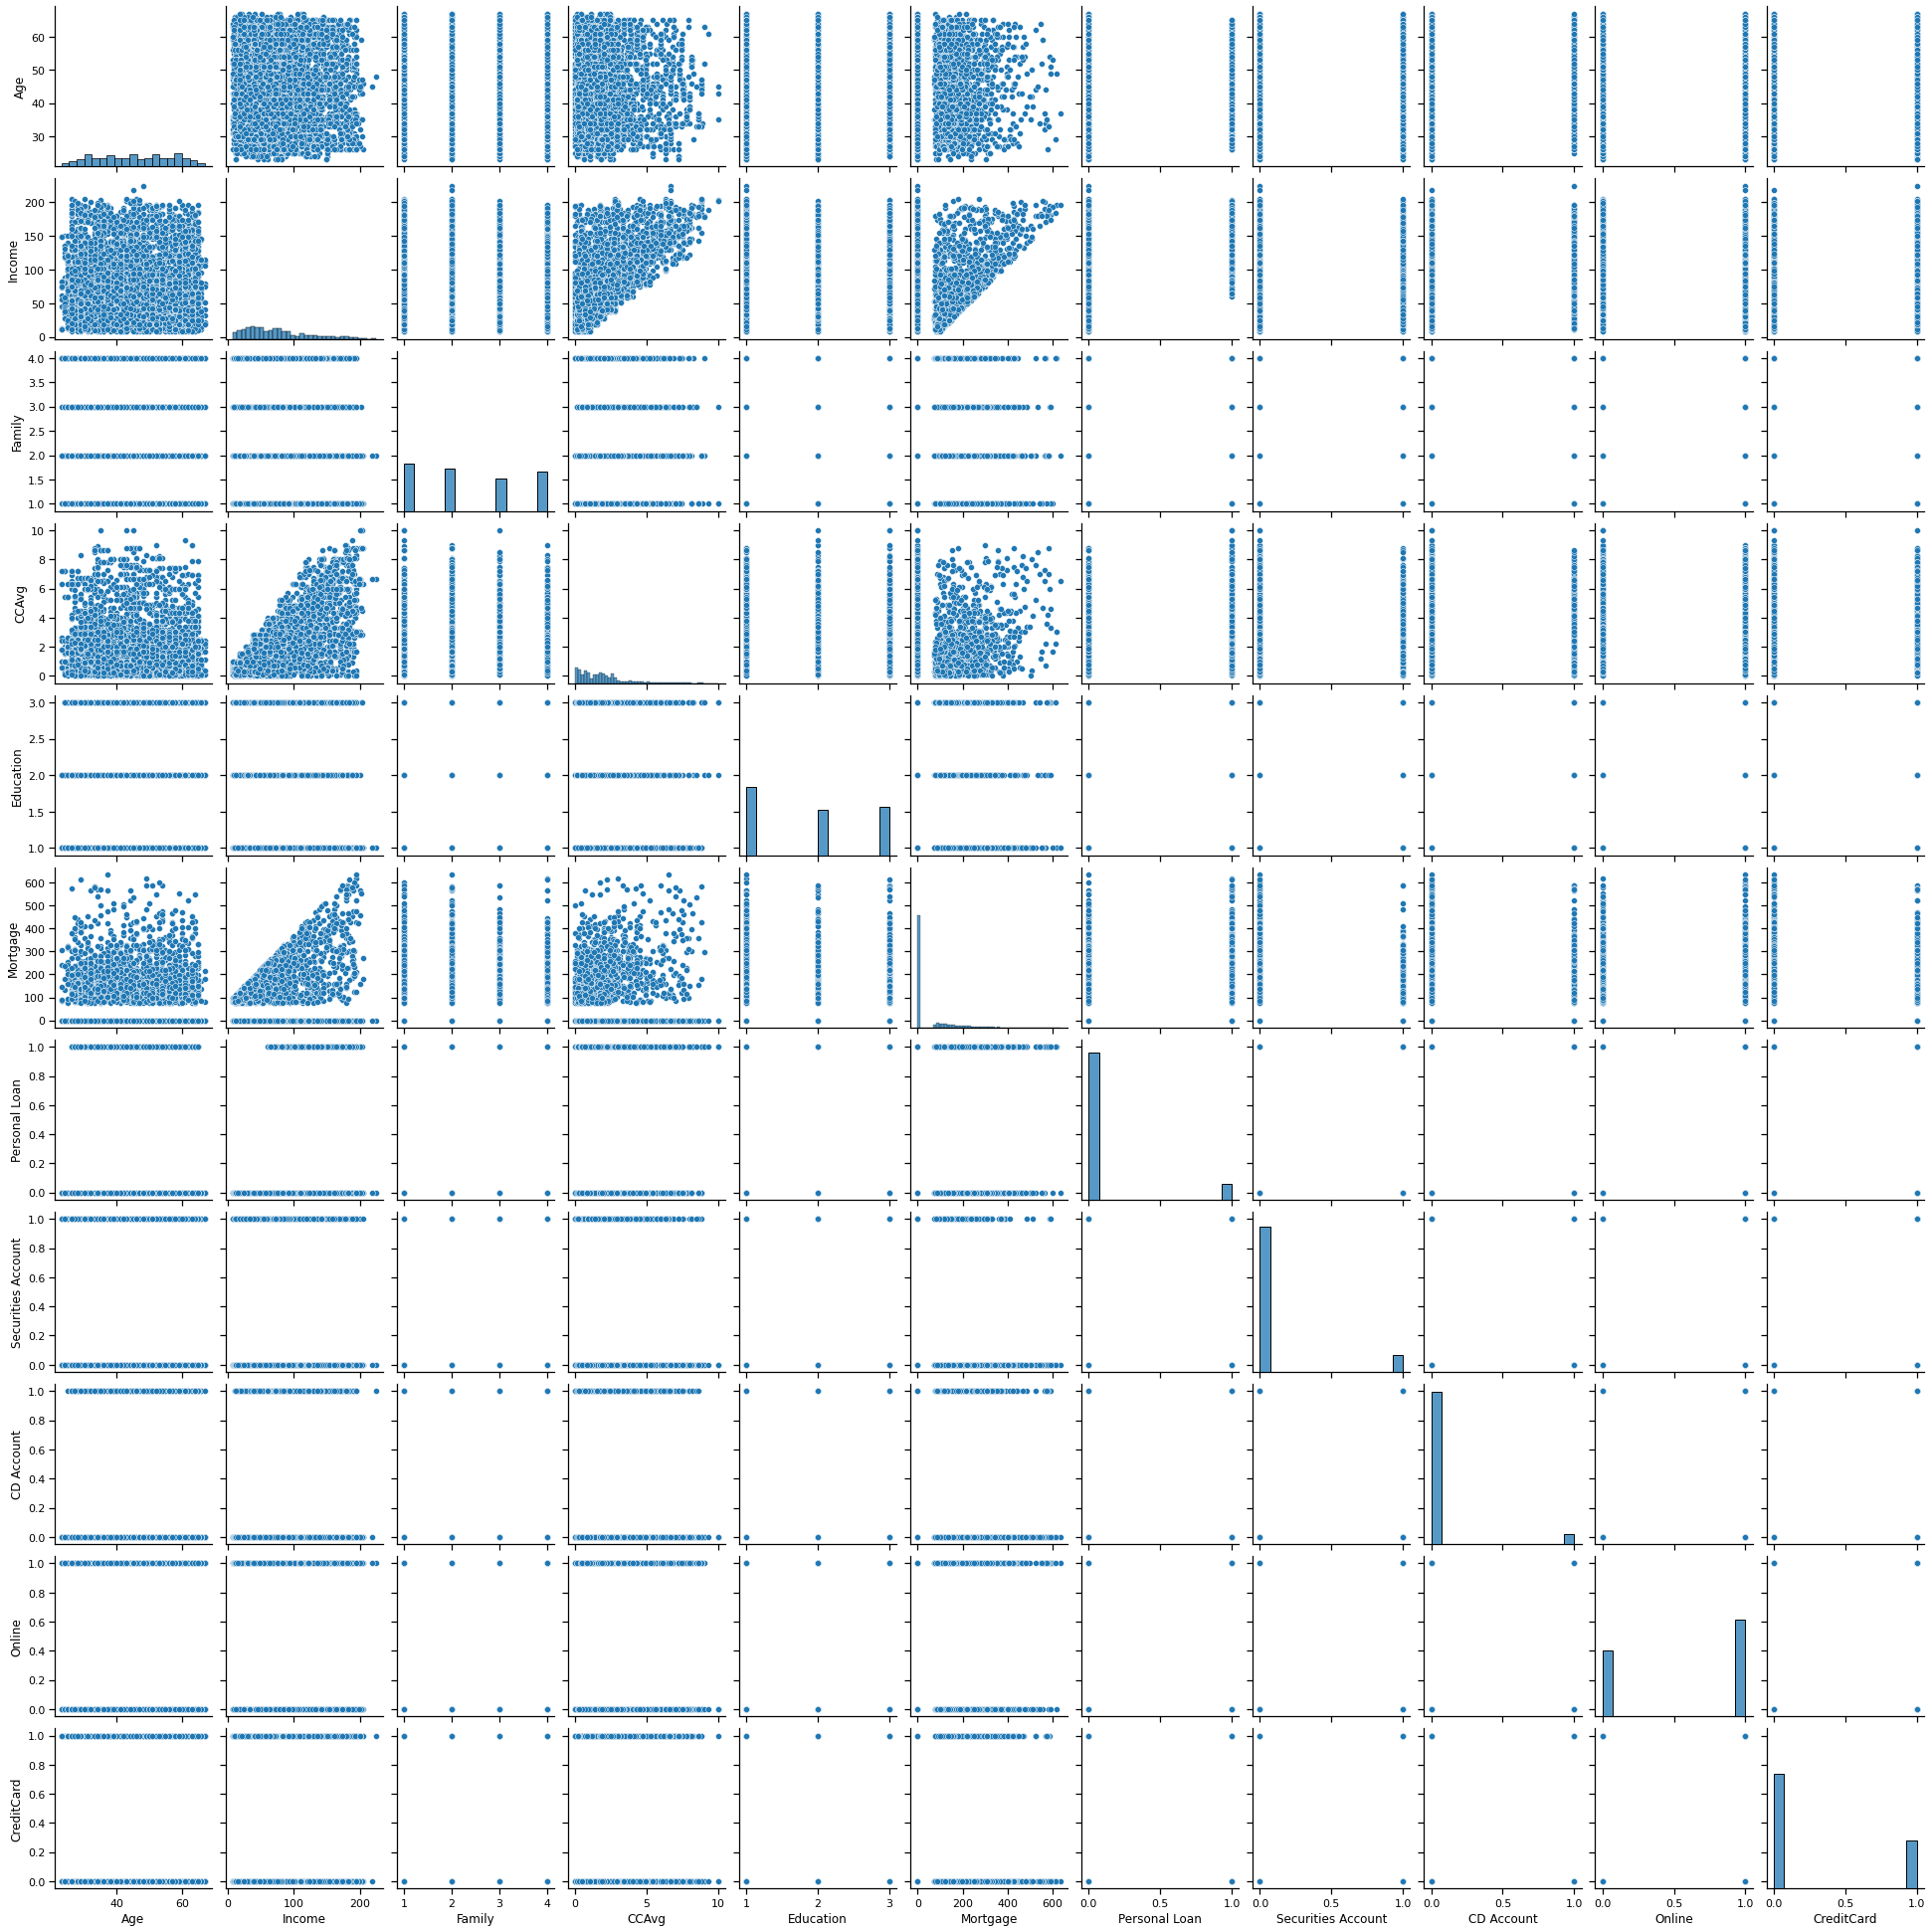

In [49]:
sns.pairplot(data)

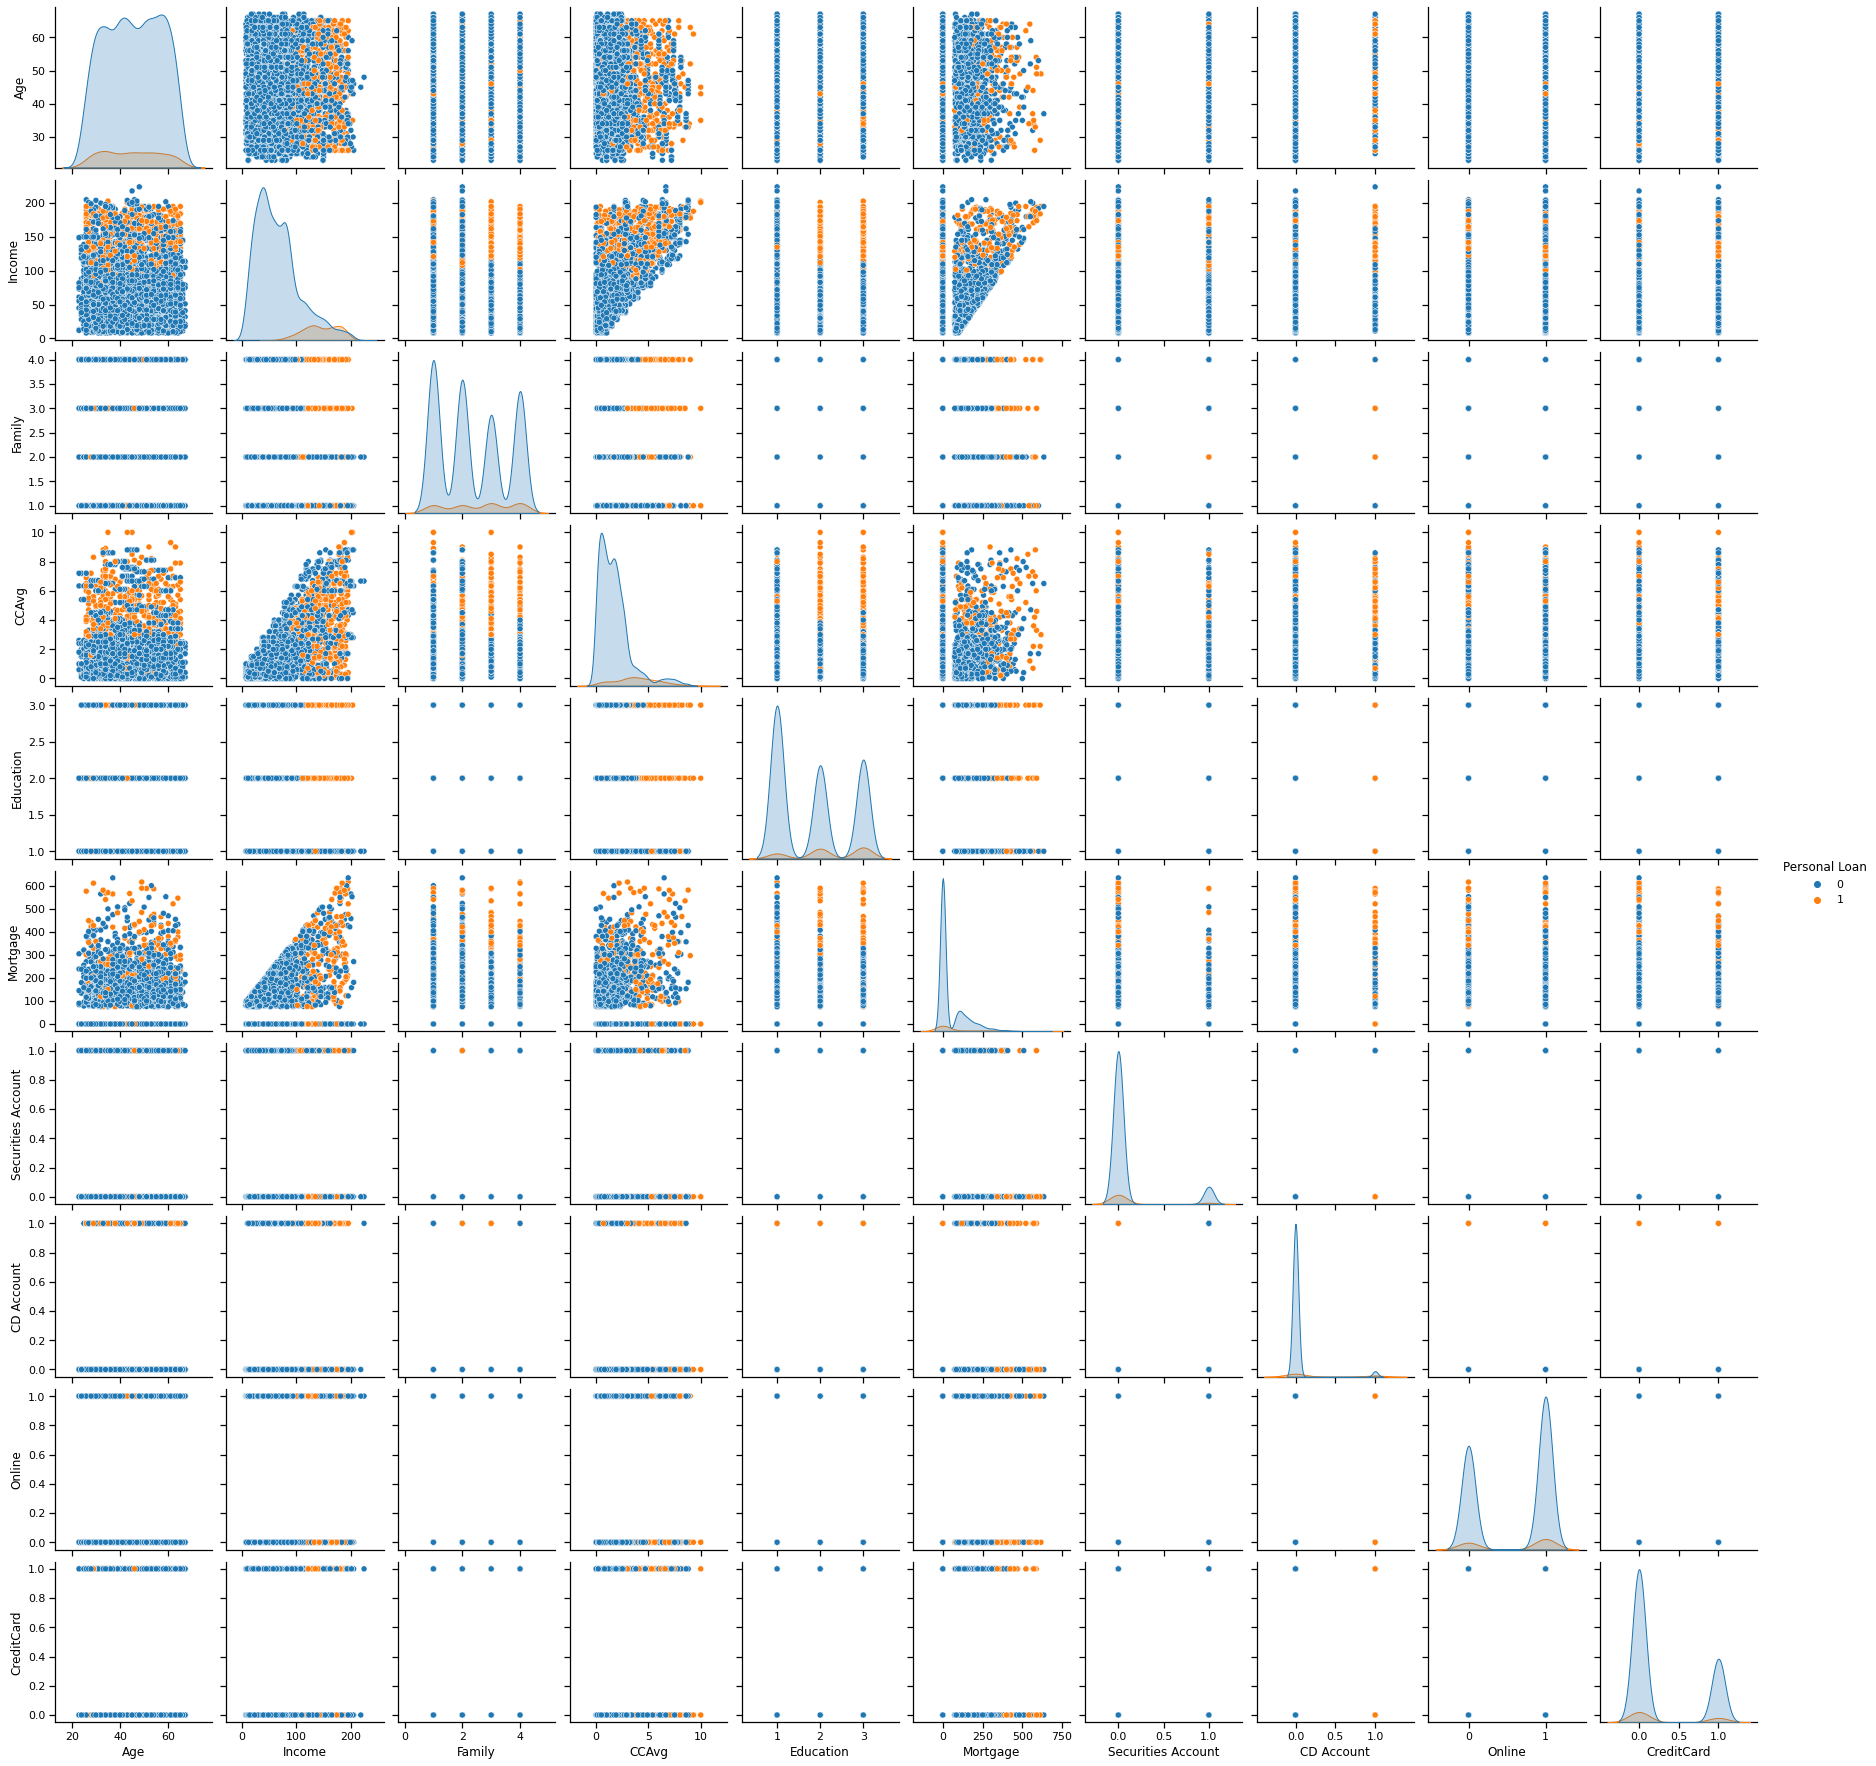

In [50]:
sns.pairplot(data,diag_kind='kde',hue='Personal Loan')

**Heat Map**

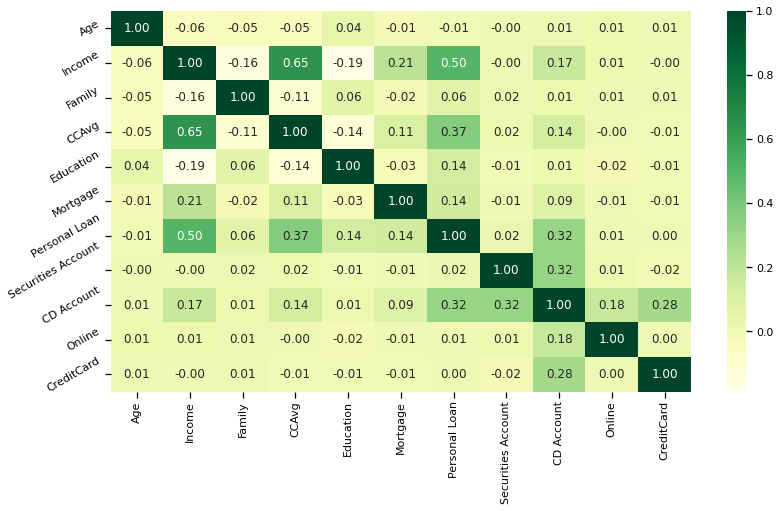

In [51]:


corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# # create a mask so we only see the correlation values once
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,cmap="YlGn", annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

**Observation**

The variables **family** and **education** are ordinal variables. The distribution of families is evenly distributes

Majority of customers who does not have loan have securities account

Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.

Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

# 4 Transformations for feature variables

In [52]:
#Taking our feature variables by dropping our target variable personal loan from the data
data_x=data.drop('Personal Loan',axis=1)
data_y=data["Personal Loan"]


From our observations from univariate analysis we observe that **Income** and **CCAvg** are positively skewed so we are applying Power Transformations to decrease their Skewness  

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

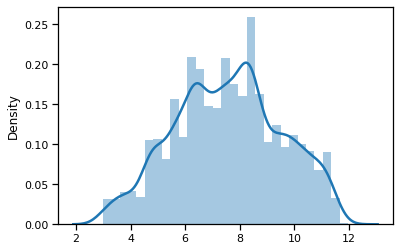

In [53]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson', standardize=False)
pt.fit(data_x['Income'].values.reshape(-1,1))
temp=pt.transform(data_x['Income'].values.reshape(-1,1))
data_x['Income']=temp
sns.distplot(temp)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

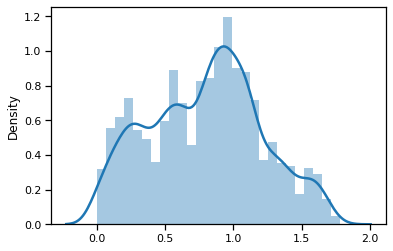

In [54]:
pt=PowerTransformer(method='yeo-johnson', standardize=False)
pt.fit(data_x['CCAvg'].values.reshape(-1,1))
temp=pt.transform(data_x['CCAvg'].values.reshape(-1,1))
data_x['CCAvg']=temp
sns.distplot(temp)

**Observation** After performing Power Transformation we can observe that both Income and CCAvg are become normal

**Mortgage** is also skewed but we observe that most of the values are zeroes and remainig values are less so here we use bining to change labels 

In [55]:
data_x['Mortgage_Int']=pd.cut(data_x['Mortgage'],
                              bins=[0,100,200,300,400,500,600,700],
                              labels=[0,1,2,3,4,5,6],
                              include_lowest=True)
data_x.drop('Mortgage',axis=1,inplace=True)
data_x.head()


,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,25,6.827583,4,0.845150,1,1,0,0,0,0
1,45,5.876952,3,0.814468,1,1,0,0,0,0
2,39,3.504287,1,0.633771,1,0,0,0,0,0
3,35,8.983393,1,1.107409,2,0,0,0,0,0
4,35,6.597314,4,0.633771,2,0,0,0,1,0


In [56]:
x=data_x.values
x

array([[25.        ,  6.82758253,  4.        , ...,  0.        ,
         0.        ,  0.        ],
       [45.        ,  5.87695225,  3.        , ...,  0.        ,
         0.        ,  0.        ],
       [39.        ,  3.50428679,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [63.        ,  5.05817273,  2.        , ...,  0.        ,
         0.        ,  0.        ],
       [65.        ,  6.82758253,  3.        , ...,  1.        ,
         0.        ,  0.        ],
       [28.        ,  8.37927414,  3.        , ...,  1.        ,
         1.        ,  0.        ]])

In [57]:
y=data_y.values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

**Standard Scaling**

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. ... If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values

In [58]:
#Scaling our data for easy to fit model and for better prediction
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()

x=sc_x.fit_transform(x)

x

array([[-1.77441684, -0.37393933,  1.39741398, ..., -1.21661774,
        -0.64531434, -0.47897149],
       [-0.02952359, -0.85862431,  0.52599094, ..., -1.21661774,
        -0.64531434, -0.47897149],
       [-0.55299157, -2.0683431 , -1.21685513, ..., -1.21661774,
        -0.64531434, -0.47897149],
       ...,
       [ 1.54088033, -1.27608433, -0.34543209, ..., -1.21661774,
        -0.64531434, -0.47897149],
       [ 1.71536965, -0.37393933,  0.52599094, ...,  0.82195086,
        -0.64531434, -0.47897149],
       [-1.51268285,  0.41720064,  0.52599094, ...,  0.82195086,
         1.54963239, -0.47897149]])

# 5 Splitting data to train and test in 70:30 ratio by stratify method

Here we are using stratify because 

Personal Loan value count of each value is


0 -   4520

1   -  480

so at the time of splitting train set may contain max number of zeroes and model cannot predict well so we use startify to split correctly 

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=50)
x_train,x_test,y_train,y_test

(array([[-0.29125758, -0.82197147,  0.52599094, ..., -1.21661774,
         -0.64531434, -0.47897149],
        [ 1.366391  ,  0.10448139,  1.39741398, ..., -1.21661774,
         -0.64531434, -0.47897149],
        [ 1.01741235,  0.10448139, -1.21685513, ...,  0.82195086,
         -0.64531434, -0.47897149],
        ...,
        [-0.90197022, -1.27608433,  1.39741398, ..., -1.21661774,
         -0.64531434, -0.47897149],
        [-0.02952359, -0.58444119, -1.21685513, ...,  0.82195086,
         -0.64531434, -0.47897149],
        [ 0.93016769, -1.0964758 , -1.21685513, ...,  0.82195086,
         -0.64531434, -0.47897149]]),
 array([[ 1.62812499, -1.05445939,  0.52599094, ...,  0.82195086,
         -0.64531434, -0.47897149],
        [-0.72748089, -0.71633756, -1.21685513, ..., -1.21661774,
          1.54963239,  0.68527618],
        [ 1.27914634, -0.64920253, -1.21685513, ...,  0.82195086,
         -0.64531434, -0.47897149],
        ...,
        [ 0.58118904, -0.61653752,  0.52599094, ..., -

# 6 Applying Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=2)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=2)

In [61]:
y_predict=classifier.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
yp=classifier.predict(x_train)
yp

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

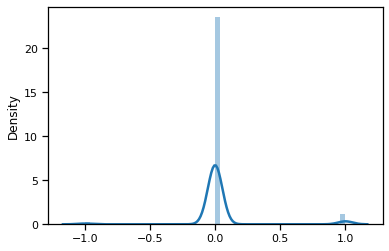

In [63]:
sns.distplot((y_test - y_predict),bins = 50)

# 7 Evaluating Model Performance

**Confusion Matrix**

describes the complete performance of the model

array([[1338,   18],
       [  71,   73]], dtype=int64)

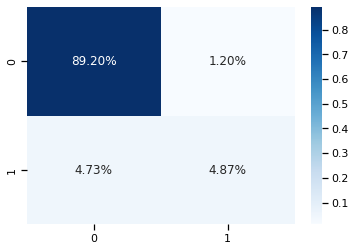

In [64]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
cm

**Accuracy Score**

Accuracy is what we usually mean, when we use the term accuracy. It is the ratio of number of correct predictions to the total number of input samples.

**NOTE**: Here we are always finding both train and test accuracy because Test accuracy should not be higher than train since the model is optimized for the latter. ... You should do a proper train/test split in which both of them have the same underlying distribution

In [65]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_predict)
tac=accuracy_score(y_train, classifier.predict(x_train))
print("test accuracy:",ac)
print("train accuracy:",tac)

test accuracy: 0.9406666666666667
train accuracy: 0.9614285714285714


**Observation**

From above we can observe that our model performs 93.6% accurately and our train accuracy is 95.5% there is no much difference so our model is correctly fitted

**Precision**

It is the number of correct positive results divided by the number of positive results predicted by the classifier.

In [66]:
from sklearn.metrics import precision_score
p=precision_score(y_test,y_predict)
p

0.8021978021978022

**Recall** 

It is the number of correct positive results divided by the number of all relevant samples (all samples that should have been identified as positive).

In [67]:
from sklearn.metrics import recall_score
rc=recall_score(y_test,y_predict)
rc

0.5069444444444444

**f1_score**

F1 Score is used to measure a test’s accuracy

F1 Score is the Harmonic Mean between precision and recall. It tells you how precise your classifier is (how many instances it classifies correctly), as well as how robust it is (it does not miss a significant number of instances).

In [68]:
from sklearn.metrics import f1_score
f1=f1_score(y_test,y_predict)
f1


0.6212765957446809

**Mean Absolute Error**

Mean Absolute Error is the average of the difference between the Original Values and the Predicted Values. It gives us the measure of how far the predictions were from the actual output.

In [69]:
from sklearn.metrics import mean_absolute_error
mse=mean_absolute_error(y_test,y_predict)
mse

0.059333333333333335

**Roc Auc Score**

AUC ROC indicates how well the probabilities from the positive classes are separated from the negative classes

In [70]:
from sklearn.metrics import roc_auc_score
ras=roc_auc_score(y_test,y_predict)
ras


0.7468350540806293

**Classification Report**

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1356
           1       0.80      0.51      0.62       144

    accuracy                           0.94      1500
   macro avg       0.88      0.75      0.79      1500
weighted avg       0.94      0.94      0.93      1500



In [72]:
eval=[tac,ac,p,rc,f1,mse,ras]
df=pd.Series(eval,index=['train_accuracy_score','test_accuracy_score','precession','Recall','F1_score','Mean Absolute Error','Roc Auc Score'],name='Evaluation Results')
df

train_accuracy_score    0.961429
test_accuracy_score     0.940667
precession              0.802198
Recall                  0.506944
F1_score                0.621277
Mean Absolute Error     0.059333
Roc Auc Score           0.746835
Name: Evaluation Results, dtype: float64

In [73]:
accuracy=[] #empty list to append accuracy of all models
f1score=[]#empty list to append f1_score of all models
recal=[]#empty list to append recall of all models
#which we can used at last to observe all models performance

# 8 Implementing various Algorithms on this dataset

**8.1 Descision Trees**

In [74]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier=DecisionTreeClassifier(criterion = 'entropy',max_depth=3,random_state=2)
tree_classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=2)

In [75]:
y_predict=tree_classifier.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

**Evaluating model Performance**

array([[1350,    6],
       [  31,  113]], dtype=int64)

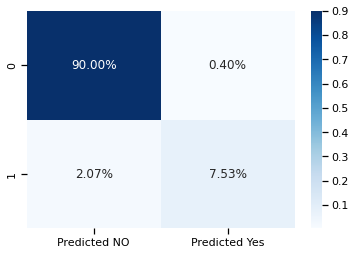

In [76]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues',xticklabels=['Predicted NO','Predicted Yes'])
cm

In [77]:
#Accuracy Score
from sklearn.metrics import accuracy_score
tac1=accuracy_score(y_train, tree_classifier.predict(x_train))
acs=accuracy_score(y_test,y_predict)
print("train_Accuracy",tac1)
print("test_Accuracy",acs)

train_Accuracy 0.9817142857142858
test_Accuracy 0.9753333333333334


There is no large difference between our train_accuracy and test_accuracy that means our model is well fitted

In [78]:
from sklearn.metrics import precision_score,recall_score,f1_score,mean_absolute_error,roc_auc_score
ps=precision_score(y_test,y_predict) #Precision
rs=recall_score(y_test,y_predict) #Recall
f1s=f1_score(y_test,y_predict) #f1Score
mae=mean_absolute_error(y_test,y_predict) #mean_absolute_error
ras1=roc_auc_score(y_test,y_predict) #roc_auc_score



In [79]:
eval=[tac1,acs,ps,rs,f1s,mae,ras1]
df=pd.Series(eval,index=['train_accuracy_score','test_accuracy_score','precession','Recall','F1_score','Mean Absolute Error','Roc Auc Score'],name='Evaluation Results')
df

train_accuracy_score    0.981714
test_accuracy_score     0.975333
precession              0.949580
Recall                  0.784722
F1_score                0.859316
Mean Absolute Error     0.024667
Roc Auc Score           0.890149
Name: Evaluation Results, dtype: float64

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1356
           1       0.95      0.78      0.86       144

    accuracy                           0.98      1500
   macro avg       0.96      0.89      0.92      1500
weighted avg       0.97      0.98      0.97      1500



**8.2 Random Forest**

In [81]:
from sklearn.ensemble import RandomForestClassifier
randomforest_model = RandomForestClassifier(max_depth=5, random_state=2)
randomforest_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=2)

In [82]:
y_predict=randomforest_model.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Evaluating model performance

array([[1355,    1],
       [  40,  104]], dtype=int64)

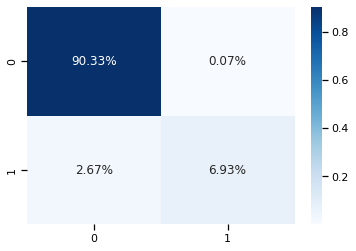

In [83]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
cm

In [84]:
#Accuracy Score
from sklearn.metrics import accuracy_score
tac2=accuracy_score(y_train, randomforest_model.predict(x_train))
acs1=accuracy_score(y_test,y_predict)
print('train_accuracy',tac2)
print("test_Accuracy",acs1)

train_accuracy 0.9868571428571429
test_Accuracy 0.9726666666666667


In [85]:
from sklearn.metrics import precision_score,recall_score,f1_score,mean_absolute_error,roc_auc_score
ps1=precision_score(y_test,y_predict) #Precision
rs1=recall_score(y_test,y_predict) #Recall
f1s1=f1_score(y_test,y_predict) #f1Score
mae1=mean_absolute_error(y_test,y_predict) #mean_absolute_error
ras2=roc_auc_score(y_test,y_predict) #roc_auc_score



In [86]:
eval=[tac2,acs1,ps1,rs1,f1s1,mae1,ras2]
df=pd.Series(eval,index=['train_accuracy_score','test_accuracy_score','precession','Recall','F1_score','Mean Absolute Error','Roc Auc Score'],name='Evaluation Results')
df

train_accuracy_score    0.986857
test_accuracy_score     0.972667
precession              0.990476
Recall                  0.722222
F1_score                0.835341
Mean Absolute Error     0.027333
Roc Auc Score           0.860742
Name: Evaluation Results, dtype: float64

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1356
           1       0.99      0.72      0.84       144

    accuracy                           0.97      1500
   macro avg       0.98      0.86      0.91      1500
weighted avg       0.97      0.97      0.97      1500



**8.3 Naive Bayes**

In [88]:
from sklearn.naive_bayes import GaussianNB
bayes_classifier=GaussianNB()
bayes_classifier.fit(x_train,y_train)


GaussianNB()

In [89]:
y_predict=bayes_classifier.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Evaluating model Performance

array([[1297,   59],
       [  68,   76]], dtype=int64)

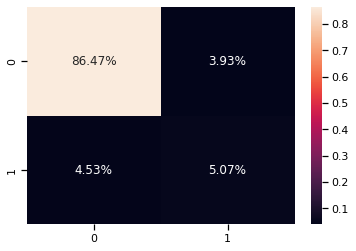

In [90]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')
cm

In [91]:
#Accuracy Score
from sklearn.metrics import accuracy_score
tac3=accuracy_score(y_train, bayes_classifier.predict(x_train))
acs2=accuracy_score(y_test,y_predict)
print("train_accuracy",tac3)
print("test_Accuracy",acs2)

train_accuracy 0.9131428571428571
test_Accuracy 0.9153333333333333


We can observe that train_accuracy and test_accuracy are very less differ by this we can say that our model fitted well

In [92]:
from sklearn.metrics import precision_score,recall_score,f1_score,mean_absolute_error,roc_auc_score
ps2=precision_score(y_test,y_predict) #Precision
rs2=recall_score(y_test,y_predict) #Recall
f1s2=f1_score(y_test,y_predict) #f1Score
mae2=mean_absolute_error(y_test,y_predict) #mean_absolute_error
ras3=roc_auc_score(y_test,y_predict) #roc_auc_score



In [93]:
eval=[tac3,acs2,ps2,rs2,f1s2,mae2,ras3]
df=pd.Series(eval,index=['train_accuracy_score','test_accuracy_score','precession','Recall','F1_score','Mean Absolute Error','Roc Auc Score'],name='Evaluation Results')
df

train_accuracy_score    0.913143
test_accuracy_score     0.915333
precession              0.562963
Recall                  0.527778
F1_score                0.544803
Mean Absolute Error     0.084667
Roc Auc Score           0.742134
Name: Evaluation Results, dtype: float64

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1356
           1       0.56      0.53      0.54       144

    accuracy                           0.92      1500
   macro avg       0.76      0.74      0.75      1500
weighted avg       0.91      0.92      0.91      1500



**8.4 K-Nearest Neighbour (KNN)**

In [95]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [96]:
y_predict=knn_classifier.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Evaluating model Performance

array([[1354,    2],
       [  64,   80]], dtype=int64)

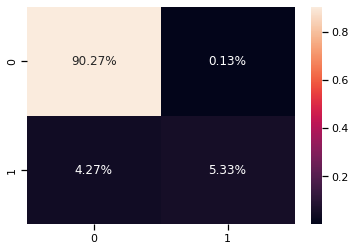

In [97]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')
cm

In [98]:
#Accuracy Score
from sklearn.metrics import accuracy_score
tac4=accuracy_score(y_train, knn_classifier.predict(x_train))
acs3=accuracy_score(y_test,y_predict)
print("train_accuracy",tac4)
print("test_Accuracy",acs3)

train_accuracy 0.9797142857142858
test_Accuracy 0.956


As we observe from above results it is only 0.25 difference in train and test accuracy so we can say model is well fitted

In [99]:
from sklearn.metrics import precision_score,recall_score,f1_score,mean_absolute_error,roc_auc_score
ps3=precision_score(y_test,y_predict) #Precision
rs3=recall_score(y_test,y_predict) #Recall
f1s3=f1_score(y_test,y_predict) #f1Score
mae3=mean_absolute_error(y_test,y_predict) #mean_absolute_error
ras4=roc_auc_score(y_test,y_predict) #roc_auc_score



In [100]:
eval=[tac4,acs3,ps3,rs3,f1s3,mae3,ras4]
df=pd.Series(eval,index=['train_accuracy','test_accuracy_score','precession','Recall','F1_score','Mean Absolute Error','Roc Auc Score'],name='Evaluation Results')
df

train_accuracy         0.979714
test_accuracy_score    0.956000
precession             0.975610
Recall                 0.555556
F1_score               0.707965
Mean Absolute Error    0.044000
Roc Auc Score          0.777040
Name: Evaluation Results, dtype: float64

In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1356
           1       0.98      0.56      0.71       144

    accuracy                           0.96      1500
   macro avg       0.97      0.78      0.84      1500
weighted avg       0.96      0.96      0.95      1500



**8.5 Support Vector Machine**

In [102]:
from sklearn.svm import SVC # "Support vector classifier"  
svm_classifier = SVC(kernel='linear', random_state=2)  
svm_classifier.fit(x_train, y_train) 

SVC(kernel='linear', random_state=2)

In [103]:
y_predict=svm_classifier.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Evaluating model Performance

array([[1338,   18],
       [  71,   73]], dtype=int64)

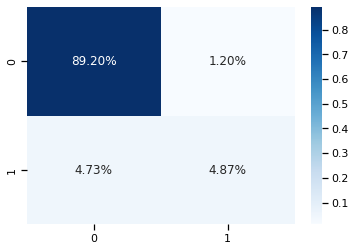

In [104]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm/np.sum(cm), annot=True,cmap="Blues", fmt='.2%')
cm

In [105]:
#Accuracy Score
from sklearn.metrics import accuracy_score
tac5=accuracy_score(y_train, svm_classifier.predict(x_train))
acs4=accuracy_score(y_test,y_predict)
print('train_accuracy',tac5)
print("test_Accuracy",acs4)

train_accuracy 0.9602857142857143
test_Accuracy 0.9406666666666667


there is no much difference in tran and test accuracy so we can say that our model is well fitted

In [106]:
from sklearn.metrics import precision_score,recall_score,f1_score,mean_absolute_error,roc_auc_score
ps4=precision_score(y_test,y_predict) #Precision
rs4=recall_score(y_test,y_predict) #Recall
f1s4=f1_score(y_test,y_predict) #f1Score
mae4=mean_absolute_error(y_test,y_predict) #mean_absolute_error
ras5=roc_auc_score(y_test,y_predict) #roc_auc_score



In [107]:
eval=[tac5,acs4,ps4,rs4,f1s4,mae4,ras5]
df=pd.Series(eval,index=['train_accuracy_score','test_accuracy_score','precession','Recall','F1_score','Mean Absolute Error','Roc Auc Score'],name='Evaluation Results')
df

train_accuracy_score    0.960286
test_accuracy_score     0.940667
precession              0.802198
Recall                  0.506944
F1_score                0.621277
Mean Absolute Error     0.059333
Roc Auc Score           0.746835
Name: Evaluation Results, dtype: float64

In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1356
           1       0.80      0.51      0.62       144

    accuracy                           0.94      1500
   macro avg       0.88      0.75      0.79      1500
weighted avg       0.94      0.94      0.93      1500



# Ensemble Methods

**8.6 Bagging Classifier**

 Bootstrap Aggregation or bagging involves taking multiple samples from your training dataset and training a model for each sample. The final output prediction is averaged across the predictions of all of the sub-models.

**Bagged Decision Tree**

Bagged Decision Trees Bagging performs best with algorithms that have high variance. A popular example are decision trees, often constructed without pruning.

In [109]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection

# kfold = model_selection.KFold(n_splits=10)
cart = DecisionTreeClassifier()

num_trees = 5

In [110]:
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees,random_state=2)
model.fit(x_train,y_train)


# results = model_selection.cross_val_score(model, x, y, cv=kfold)

# results #nothing but accuracy of each decision tree

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5,
                  random_state=2)

In [111]:
y_predict=model.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Evaluating Model Performance


In [112]:
# acs5=model.score(x_test,y_test)
# acs5 #test accuracy
from sklearn.metrics import accuracy_score
tac7=accuracy_score(y_train, model.predict(x_train))#train accuracy
acs5=accuracy_score(y_test,y_predict) #test accuracy
tac7,acs5

(0.998, 0.982)

In [113]:
# tac7=model.score(x_train,y_train) #train accuracy
print("train_accuracy",tac7)
print("test_accuracy",acs5)


train_accuracy 0.998
test_accuracy 0.982


there is no much difference in tran and test accuracy so we can say that our model is well fitted

array([[1352,    4],
       [  23,  121]], dtype=int64)

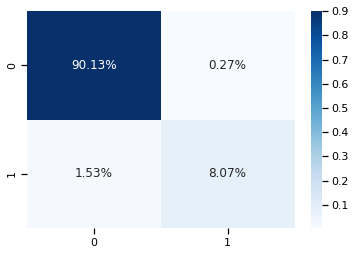

In [114]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm/np.sum(cm), annot=True,cmap="Blues", fmt='.2%')
cm

In [115]:
from sklearn.metrics import precision_score,recall_score,f1_score,mean_absolute_error,roc_auc_score
ps5=precision_score(y_test,y_predict) #Precision
rs5=recall_score(y_test,y_predict) #Recall
f1s5=f1_score(y_test,y_predict) #f1Score
mae5=mean_absolute_error(y_test,y_predict) #mean_absolute_error
ras6=roc_auc_score(y_test,y_predict) #roc_auc_score



In [116]:
eval=[tac7,acs5,ps5,rs5,f1s5,mae5,ras6]
df=pd.Series(eval,index=['train_accuracy_score','test_accuracy_score','precession','Recall','F1_score','Mean Absolute Error','Roc Auc Score'],name='Evaluation Results')
df

train_accuracy_score    0.998000
test_accuracy_score     0.982000
precession              0.968000
Recall                  0.840278
F1_score                0.899628
Mean Absolute Error     0.018000
Roc Auc Score           0.918664
Name: Evaluation Results, dtype: float64

In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1356
           1       0.97      0.84      0.90       144

    accuracy                           0.98      1500
   macro avg       0.98      0.92      0.94      1500
weighted avg       0.98      0.98      0.98      1500



In [118]:

# acs5=results.mean() #It gives mean of our results

# print("accuracy:",acs5)

**8.7 Boosting Classifier**

Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence.

**Gradient Boosting**

Gradient Boosting (also called Gradient Boosting Machines) are one of the most sophisticated ensemble techniques. It is also a technique that is proving to be perhaps of the the best techniques available for improving performance via ensembles.

In [122]:
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier

seed = 7
num_trees = 50

In [125]:
kfold = model_selection.KFold(n_splits=10)
model = GradientBoostingClassifier(n_estimators=num_trees)
model.fit(x_train,y_train)
# results = model_selection.cross_val_score(model, x, y, cv=kfold)
# results

GradientBoostingClassifier(n_estimators=50)

In [126]:
y_predict=model.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Evaluating Model Performance


In [127]:
# acs6=model.score(x_test,y_test)
#
from sklearn.metrics import accuracy_score
tac8=accuracy_score(y_train, model.predict(x_train))#train accuracy
acs6=accuracy_score(y_test,y_predict) #test accuracy
tac8,acs6

(0.9908571428571429, 0.9793333333333333)

In [128]:
model.decision_function(x)
#Average of the decision functions of the base classifiers

array([-6.28959951, -6.28959951, -6.28959951, ..., -6.28959951,
       -6.22370719, -5.52985948])

In [129]:
# tac8=model.score(x_train,y_train) 
print("train_accuracy",tac8)
print("test_accuracy",acs6)

train_accuracy 0.9908571428571429
test_accuracy 0.9793333333333333


there is no much difference in tran and test accuracy so we can say that our model is well fitted

array([[1353,    3],
       [  28,  116]], dtype=int64)

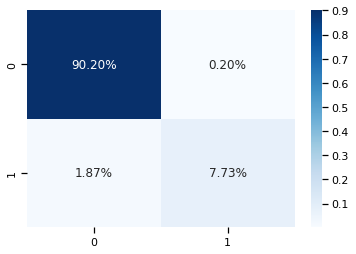

In [130]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm/np.sum(cm), annot=True,cmap="Blues", fmt='.2%')
cm

In [131]:
from sklearn.metrics import precision_score,recall_score,f1_score,mean_absolute_error,roc_auc_score
ps6=precision_score(y_test,y_predict) #Precision
rs6=recall_score(y_test,y_predict) #Recall
f1s6=f1_score(y_test,y_predict) #f1Score
mae6=mean_absolute_error(y_test,y_predict) #mean_absolute_error
ras7=roc_auc_score(y_test,y_predict) #roc_auc_score



In [132]:
eval=[tac8,acs6,ps6,rs6,f1s6,mae6,ras7]
df=pd.Series(eval,index=['train_accuracy_score','test_accuracy_score','precession','Recall','F1_score','Mean Absolute Error','Roc Auc Score'],name='Evaluation Results')
df

train_accuracy_score    0.990857
test_accuracy_score     0.979333
precession              0.974790
Recall                  0.805556
F1_score                0.882129
Mean Absolute Error     0.020667
Roc Auc Score           0.901672
Name: Evaluation Results, dtype: float64

In [133]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1356
           1       0.97      0.81      0.88       144

    accuracy                           0.98      1500
   macro avg       0.98      0.90      0.94      1500
weighted avg       0.98      0.98      0.98      1500



In [134]:

# acs6=results.mean()

# print("accuracy:",acs6)

**8.8 Voting Classifier**

Voting Ensemble Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms

In [135]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [136]:
# create the sub models
estimators = []
model1 = LogisticRegression(random_state=2)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier(random_state=2)
estimators.append(('cart', model2))
model3 = SVC(random_state=2)
estimators.append(('svm', model3))

In [137]:
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(x_train,y_train)
# results = model_selection.cross_val_score(ensemble, x, y, cv=kfold)
# results

VotingClassifier(estimators=[('logistic', LogisticRegression(random_state=2)),
                             ('cart', DecisionTreeClassifier(random_state=2)),
                             ('svm', SVC(random_state=2))])

In [138]:
y_predict=ensemble.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Evaluating Model Performance


In [139]:
from sklearn.metrics import accuracy_score
tac9=accuracy_score(y_train, ensemble.predict(x_train))#train accuracy
acs7=accuracy_score(y_test,y_predict)#test ACcuracy
tac9,acs7

(0.9848571428571429, 0.968)

In [140]:
# tac8=model.score(x_train,y_train) 
print("train_accuracy",tac9)
print("test_accuracy",acs7)

train_accuracy 0.9848571428571429
test_accuracy 0.968


there is no much difference in tran and test accuracy so we can say that our model is well fitted

array([[1354,    2],
       [  46,   98]], dtype=int64)

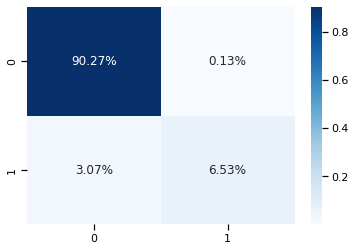

In [141]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm/np.sum(cm), annot=True,cmap="Blues", fmt='.2%')
cm

In [142]:
from sklearn.metrics import precision_score,recall_score,f1_score,mean_absolute_error,roc_auc_score
ps7=precision_score(y_test,y_predict) #Precision
rs7=recall_score(y_test,y_predict) #Recall
f1s7=f1_score(y_test,y_predict) #f1Score
mae7=mean_absolute_error(y_test,y_predict) #mean_absolute_error
ras8=roc_auc_score(y_test,y_predict) #roc_auc_score



In [143]:
# acs7=results.mean()

# print("accuracy:",acs7)

In [144]:
eval=[tac9,acs7,ps7,rs7,f1s7,mae7,ras8]
df=pd.Series(eval,index=['train_accuracy_score','test_accuracy_score','precession','Recall','F1_score','Mean Absolute Error','Roc Auc Score'],name='Evaluation Results')
df

train_accuracy_score    0.984857
test_accuracy_score     0.968000
precession              0.980000
Recall                  0.680556
F1_score                0.803279
Mean Absolute Error     0.032000
Roc Auc Score           0.839540
Name: Evaluation Results, dtype: float64

In [145]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1356
           1       0.98      0.68      0.80       144

    accuracy                           0.97      1500
   macro avg       0.97      0.84      0.89      1500
weighted avg       0.97      0.97      0.97      1500



**Making lists for performance analysis**

In [146]:
accuracy=[ac,acs,acs1,acs2,acs3,acs4,acs5,acs6,acs7]
f1score=[f1,f1s,f1s1,f1s2,f1s3,f1s4,f1s5,f1s6,f1s7]
recal=[rc,rs,rs1,rs2,rs3,rs4,rs5,rs6,rs7]
print(f1score)
print(recal)
print(accuracy)
#We are generating list of accuracy of all the models

[0.6212765957446809, 0.8593155893536122, 0.8353413654618473, 0.5448028673835126, 0.7079646017699116, 0.6212765957446809, 0.8996282527881041, 0.8821292775665399, 0.8032786885245902]
[0.5069444444444444, 0.7847222222222222, 0.7222222222222222, 0.5277777777777778, 0.5555555555555556, 0.5069444444444444, 0.8402777777777778, 0.8055555555555556, 0.6805555555555556]
[0.9406666666666667, 0.9753333333333334, 0.9726666666666667, 0.9153333333333333, 0.956, 0.9406666666666667, 0.982, 0.9793333333333333, 0.968]


# Comparing Model Performances

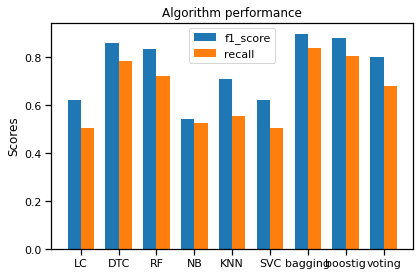

,Logistic Regression,Decision Tree,Random Forest,Naive bayes,KNN-CLASSIFIER,Suport Vector Machine,Bagging,boosting,voting
f1_score,0.621277,0.859316,0.835341,0.544803,0.707965,0.621277,0.899628,0.882129,0.803279
recall,0.506944,0.784722,0.722222,0.527778,0.555556,0.506944,0.840278,0.805556,0.680556


In [147]:
models=['LC','DTC','RF','NB','KNN','SVC','bagging','boostig','voting']

ind = np.arange(len(accuracy))  # the x locations for the groups
width = 0.35  # the width of the bars

fig,ax = plt.subplots()


rects1 = ax.bar(ind - width/2, f1score, width, 
                label='f1_score')
rects2 = ax.bar(ind + width/2, recal, width, 
                label='recall')

ax.set_ylabel('Scores')
ax.set_title('Algorithm performance')
ax.set_xticks(ind)
ax.set_xticklabels(models)
ax.legend()


def autolabel(rects, xpos='center'):
   

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


# autolabel(rects1, "left")
# autolabel(rects2, "right")

fig.tight_layout()

plt.show()
dt=np.array([f1score,recal])
df=pd.DataFrame(dt,columns=['Logistic Regression','Decision Tree','Random Forest','Naive bayes','KNN-CLASSIFIER','Suport Vector Machine','Bagging',"boosting",'voting'],index=['f1_score','recall'])
df

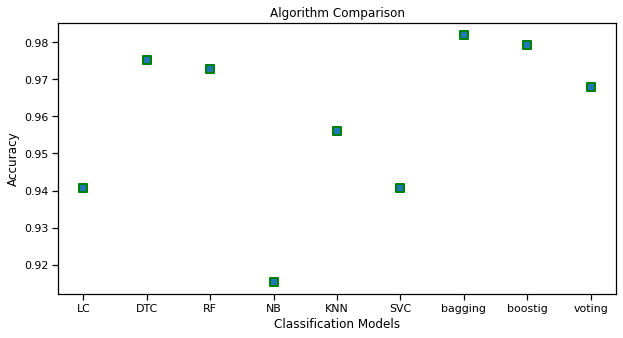

,Accuracy
Logistic Regression,0.940667
Decision Tree,0.975333
Random Forest,0.972667
Naive bayes,0.915333
KNN-CLASSIFIER,0.956000
Suport Vector Machine,0.940667
Bagging,0.982000
boosting,0.979333
voting,0.968000


In [148]:
models=['LC','DTC','RF','NB','KNN','SVC','bagging','boostig','voting']
plt.figure(figsize=(10,5))
plt.scatter(models,accuracy,linewidth=2,s=50,marker='s',edgecolors='green')

plt.xlabel("Classification Models") 
plt.ylabel("Accuracy") 
plt.title("Algorithm Comparison")
plt.show()
df=pd.DataFrame(accuracy,index=['Logistic Regression','Decision Tree','Random Forest','Naive bayes','KNN-CLASSIFIER','Suport Vector Machine','Bagging',"boosting",'voting'],columns=['Accuracy'])
df



# Observation from comparing model performances

* *From these above results it would suggest that Bagged Decision Tree Clasifier is  perhaps worthy of further study on this problem.*



* *Among all the  methods Bagging Classifier is the best of all which gives best results we can observe it's accuracy (98.3%) and also We can observe from first graph that among all **Bagging** has highest **recall**(83.3%) and **f1_score**(90.5%) that means more true positive values and more test's accuracy*

* *we observe that there is less difference betwwen in the results of Bagging (98.2%) and Boosting(97.9%=98%) and also decision tree also scores well i.e,97.53 % which also best,if we want to go for classification models rather than ensembel techniques we can choose **Decision Tree** also but here i prefer for **Bagged Decision Tree** so we can prefer **Bagging** most*

* ***So we can use Bagged Decision Tree classifier for best results***

<!-- 
*As we used Decision Tree Classifier in Bagging,finally we can say from all the above models **"Decission Tree"** or **"Bagging Classifier"** is best for our problem* -->

# 9 Conclusion

*The aim of the bank is to convert there liability customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data.*

*We observe that **Age** and **Experience** are highly coorelated because of this it may effect our classification, and there is some wrong data in experience like negative values, we know experience doesn't contain negative values anywhere so i used to drop Experience column from given data*

*And I also dropped **ID** and **ZIP Code** which cannot effect our target variable*

*After analyzing the data i came to know that there is skewness in **CCAvg** and **Income** which are provided in our data so i done some transformations reduced the skewness*

*Total **Nine Techniques** were used in this study.*

* Logistic Regression

* Decision Tree 

* Random Forest 

* Naive bayes

* K-Nearest Neighbour CLASSIFIER

* Suport Vector Machine

* Bagged Decision Tree

* Gradient Boosting

* Voting

Below are the results observed in all the Nine models

**Logistic Regression**

* train_accuracy_score=0.955429

* test_accuracy_score=0.936000

* precession=0.744898

* Recall=0.506944

* F1_score=0.603306

* Mean Absolute Error=0.064000

* Roc Auc Score=0.744254

**Decision Tree**

* train_accuracy_score    0.981714

* test_accuracy_score     0.975333

* precession              0.949580

* Recall                  0.784722

* F1_score                0.859316

* Mean Absolute Error     0.024667

* Roc Auc Score           0.890149



**Random Forest**

* train_accuracy_score  =  0.986857

* test_accuracy_score =    0.972000

* precession =             1.000000

* Recall  =                0.708333

* F1_score =               0.829268

* Mean Absolute Error  =   0.028000

* Roc Auc Score        =   0.854167

**Naive Bayes**

* train_accuracy_score =   0.884571

* test_accuracy_score   =  0.886667

* precession          =   0.431579

* Recall               =   0.569444

* F1_score           =     0.491018

* Mean Absolute Error =    0.113333

* Roc Auc Score        =   0.744899

**K-NN Classifier**

* train_accuracy_score   = 0.884571

* test_accuracy_score    = 0.886667

* precession             = 0.431579

* Recall                 =0.569444

* F1_score               = 0.491018

* Mean Absolute Error    =0.113333

* Roc Auc Score          =0.744899

**Support Vector Machine**

* train_accuracy_score   = 0.959143

* test_accuracy_score     =0.937333

* precession              =0.790698

* Recall                  =0.472222

* F1_score                =0.591304

* Mean Absolute Error     =0.062667

* Roc Auc Score           =0.729474

**Bagged Decision Tree (Bagging)**

* train_accuracy_score   = 0.998000

* test_accuracy_score     =0.982000

* precession              =0.968000

* Recall                  =0.840278

* F1_score                =0.899628

* Mean Absolute Error     =0.018000

* Roc Auc Score           =0.918664

**Gradient Boosting (Boosting)**

* train_accuracy_score =   0.990857

* test_accuracy_score  =   0.979333

* precession    =        =  0.974790

* Recall  =                0.805556

* F1_score =               0.882129

* Mean Absolute Error =    0.020667

* Roc Auc Score  =         0.901672

**Voting**

* train_accuracy_score =   0.984571

* test_accuracy_score    = 0.972000

* precession             = 1.000000

* Recall                 = 0.708333

* F1_score               = 0.829268

* Mean Absolute Error    = 0.028000

* Roc Auc Score          = 0.854167

*From the above observations , it seems like  Bagging Decision Tree  have the highest **accuracy** and **Recall** and **f1_score** and **Roc Auc Score** as compared to remaining classifiers due to these our model can predict  well if the person can take the **Personal Loan** or not
 or else we can take **Gradent Boosting** or **Decision Trees** or **Random Forest** or **Voting** which also predict well.As we see Gradient Boosting performance is nearer to Bagging.*
 
 *Voting and Random Forest evalution results are equal to each other*

 *if we are not aware of Bagging and Boosting and Voting like these Ensemble techniques we can go among Decision Tree or Random Forest*
 
 *as we see that Decision Tree and Random Forest performs some what similar on our data set but evaluation parameters results are very nice for Random Forest when compared to Decision Tree* 

*I prefer Bagged Decision Tree for better predictions* 

 *so we can choose **Bagged Decision Tree** as our final model which will predict best results*